
#**Machine Learning And Data Science Laboratory(410501)**

#BE Sem I Honors in ML&DS

#Academic Year: 2022-23

#Lab Assignment No.4

**NAME : CHITTARANJAN RATHOD**

**ROLL NO : 42457**

**PRN NO : 72017193J**

**ABC ID : 129-879-043-197**

**BRANCH : E&TC**

**COLLEGE : PICT**

In [ ]:
import csv
import nltk
import numpy as np
import re
import random
from nltk.corpus import wordnet
from nltk.tokenize import TweetTokenizer as tt
import math
tokens=[]
d=dict()
with open(r'/content/tweets-dataset.csv','r',encoding="utf8") as csvfile:
    reader1=csv.reader(csvfile)
    c=0
    for i in reader1:
        token=tt().tokenize(i[0])
        actual=[]
        for i in token:
            k=re.findall(r"[A-Za-z']+",i)
            if len(k)==1 and len(i)==len(k[0]):
                if 'http' in k[0]:
                    k=[k[0].replace('http','')]
                if 'https' in k[0]:
                    k=[k[0].replace('https','')]                    
                k=[k[0].lower()]
                if not ((len(k[0])==1 and (k[0]=="'" )) or len(k[0])==0):
                    actual+=k
                if k[0] in d:
                    d[k[0]]+=1
                else:
                    d[k[0]]=1
        tokens+=actual
types=set(tokens)
n_tokens=len(tokens)
n_types=len(types)
print('Number of tokens : '+str(n_tokens))
print('Number of types : '+str(n_types))
print('TTR : '+str(n_types/n_tokens))

Number of tokens : 283330
Number of types : 30260
TTR : 0.10680125648537042


# Zipf's Law of Length

[nltk_data] Downloading package wordnet to /root/nltk_data...


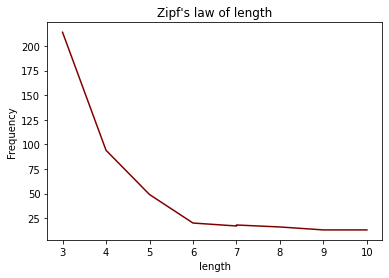

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline  
frequency_types=dict()
for i in tokens:
    if i in frequency_types:
        frequency_types[i]+=1
    else:
        frequency_types[i]=1
#wordlength_frequency=dict()
words_chosen=['show','complete','welcome','famous','holiday','champions','one','girls','parliament']

axes=[]
for i in words_chosen:
    axes.append([len(i),frequency_types[i],i])
axes.sort()
x=[]
y=[]
for i in axes:
    x.append(i[0])
    y.append(i[1])

plt.plot(x,y,color='maroon')
plt.title("Zipf's law of length")
plt.xlabel('length')
plt.ylabel('Frequency')
plt.show()

According to this law $frequency * wordlength = constant$ , In the plot below the graph traces hyperbola $xy=c$, from which we can say that Zipf's law of length holds good.

# Zip's Law of Meanings

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

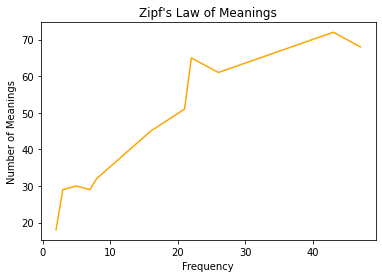

In [ ]:
import nltk

nltk.download('all')

nltk.download('wordnet')
l1=[]
freq=[]
num_meanings=[]
words=['clubs','crackers','tip','matches','cases','starts','cover','deal','marks','getting','made']
meanings=[]
tokennumber=0
for i in words:
    c=0
    mean_i=[]
    for syn in wordnet.synsets(i):
        for j in syn.lemmas():
            mean_i.append(j.name())
    meanings.append(mean_i)
    num_meanings.append(len(set(mean_i)))
    freq.append(frequency_types[i])

plt.plot(freq,num_meanings,color='orange')
plt.title("Zipf's Law of Meanings")
plt.xlabel('Frequency')
plt.ylabel('Number of Meanings')
plt.show()

This plot seems to be tracing the curve $y=k*sqrt(x)$ so we can say that Zipf's law of meanings holds good


# Heap's Law


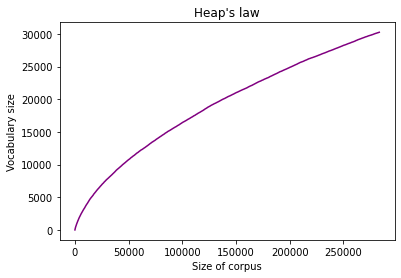

k = 9.32728575149127 and 𝛽 = 0.6475121241458738


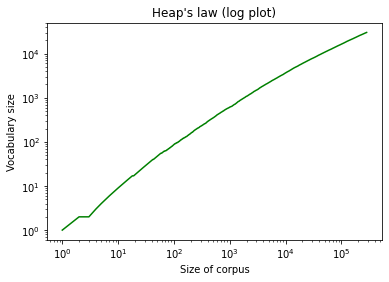

In [ ]:
hash_map={}
x=[]
y=[0]
for i in range(len(tokens)):
    x.append(i+1)
    if tokens[i] not in hash_map:
        y.append(y[-1]+1)
        hash_map[tokens[i]]=1
    else:
        y.append(y[-1])
plt.plot(x,y[1:],color='purple')
plt.title("Heap's law")
plt.xlabel('Size of corpus')
plt.ylabel('Vocabulary size')
plt.show()
base=[10 for i in range(len(x))]
a=np.log(x)/np.log(base)
b=np.log(y[1:])/np.log(base)
linfit=np.polyfit(a,b,1)
print('k = '+str(10**linfit[1])+' and '+'𝛽 = '+str(linfit[0]))
plt.plot(x,y[1:],color='green')
plt.xscale('log',basex=10)
plt.yscale('log',basey=10)
plt.title("Heap's law (log plot)")
plt.xlabel('Size of corpus')
plt.ylabel('Vocabulary size')
plt.show()    

The plot of **log(vocabulary_size) vs log(size_of_corpus)** seems to be almost **linear** hence we can say that **Heap's Law** is satisfied. According to Heap's law $V=kN^\beta$ where V=size of vocabulary and N=size of the corpus. Here $k=9.327$ and $\beta =0.64751$